# Bike Sharing Data Analysis
This project explores the Bike Sharing dataset, focusing on how weather and time factors affect rental counts. Visualizations include line plots, bar charts, scatterplots, and correlation heatmaps to uncover patterns and relationships.

## 1. Importing Libraries 
I import libraries like pandas for data manipulation, matplotlib and seaborn for visualization, and numpy for numerical operations.

In [1]:
import pandas as pd       
import matplotlib.pyplot as plt 
import seaborn as sns

## 2. Loading the Dataset 
Reading the Bike Sharing dataset into a pandas dataframe for analysis.

In [2]:
data = pd.read_csv('/kaggle/input/bike-sharing-dataset/hour.csv')

## 3. First Look at the Data 
Checking the head and first few rows and summary statistics to understand the structure of the data.

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## 4. Data Visualization 
Visualizing trends over time using a line plot, Barplot,Scatterplot, heatmap to better understand patterns in bike rentals.

## 4.1 Line Plot
Visualizing trends over time using a line plot to better understand patterns in bike rentals.

/tmp/ipykernel_13/2097932916.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='hr', y='cnt', ci=None)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


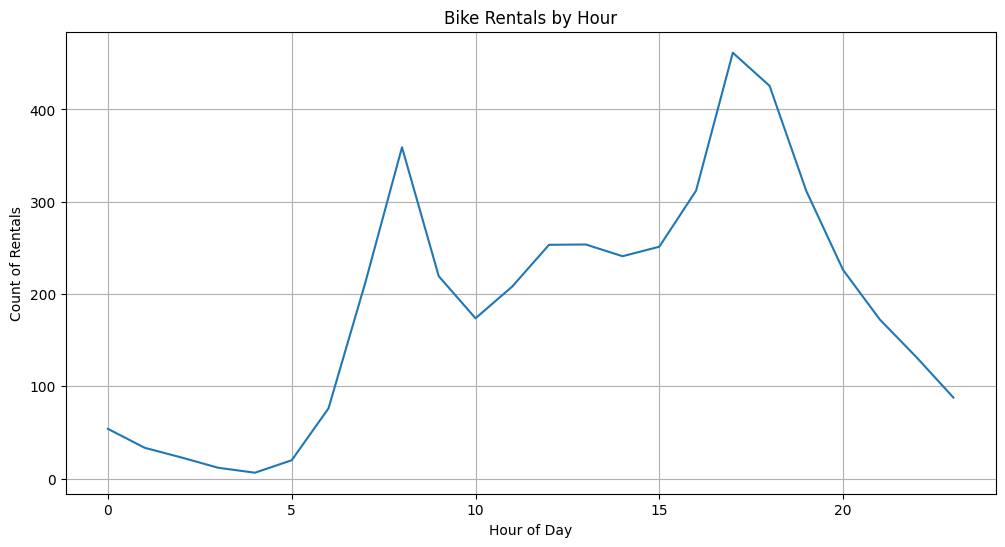

In [5]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='hr', y='cnt', ci=None)
plt.title('Bike Rentals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Rentals')
plt.grid(True)
plt.show()

**Analysis:**
The line plot shows clear seasonal patterns in bike rentals. Rentals tend to be higher during the summer months and lower during the winter, suggesting that weather and temperature strongly influence bike usage.


### 4.2 Bike Rentals by Weekday 
Visualizing the total bike rentals for each day of the week to understand peak and low usage days

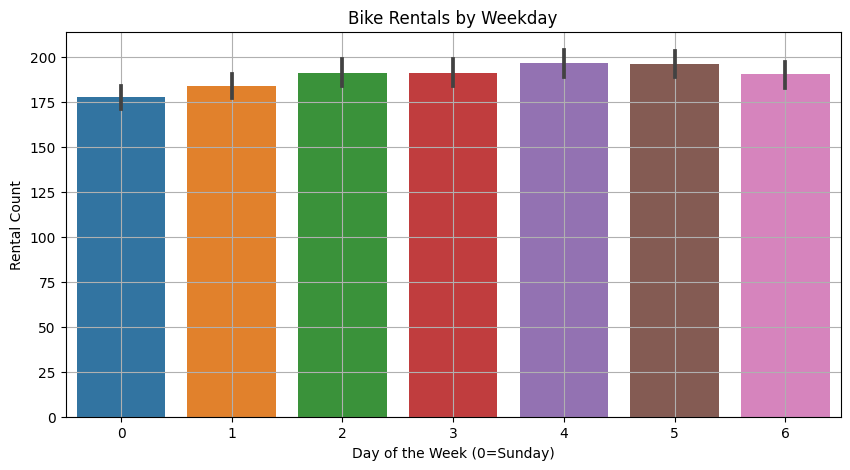

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='weekday', y='cnt')
plt.title('Bike Rentals by Weekday')
plt.xlabel('Day of the Week (0=Sunday)')
plt.ylabel('Rental Count')
plt.grid(True)
plt.show()

**Analysis:**
From the bar chart, we observe that bike rentals are higher on weekdays compared to weekends,
with Thursday and Friday showing the highest counts.
This indicates that people likely use bikes more for commuting during the workweek.

### 4.3 Relationship Between Temperature and Rentals

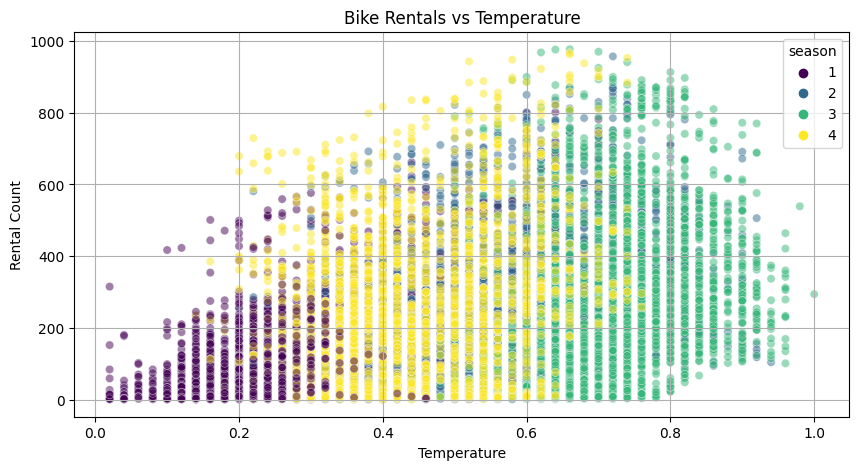

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temp', y='cnt', data=data, alpha=0.5,  hue='season',
                palette='viridis')
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.grid(True)
plt.show()

**Analysis:**
The scatterplot shows a clear positive relationship between temperature and rental counts.  
As temperatures rise, the number of bike rentals tends to increase, especially between 15°C and 30°C.  
There is also a higher density of rentals in moderate temperature ranges, suggesting people prefer to rent bikes during comfortable weather.

## 4.4 Correlation Heatmap 
Plotting a heatmap to observe the correlation between numerical variables

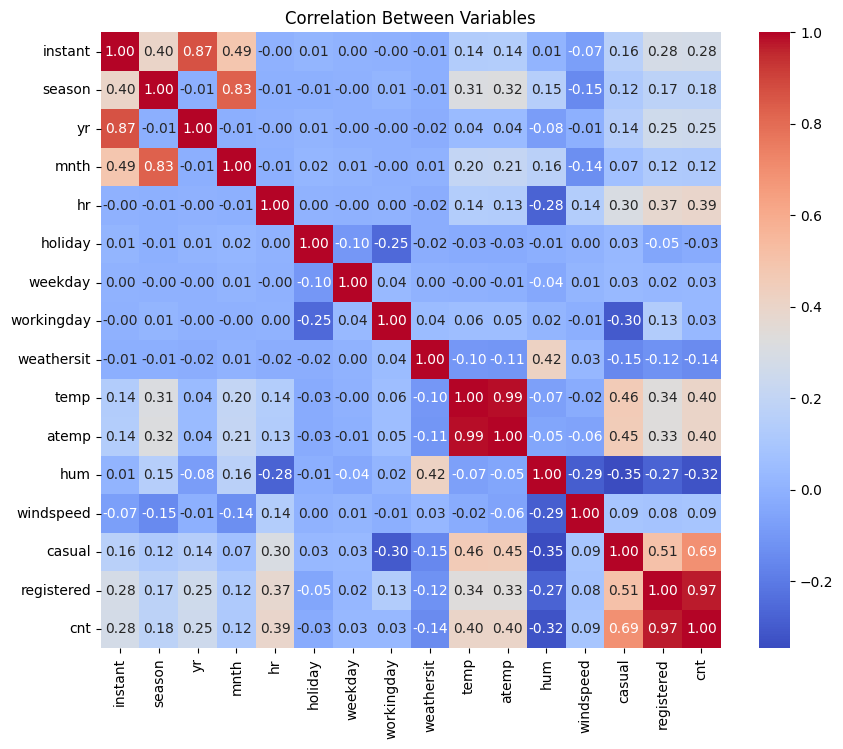

In [8]:
numeric_df= data.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()

**Analysis:**
The heatmap shows a strong positive correlation between temperature (`temp`) and bike rentals (`cnt`), indicating that higher temperatures lead to more rentals.  
Humidity (`hum`) and windspeed (`windspeed`) have weaker or even negative correlations with rental counts.  
This suggests that weather conditions, especially temperature, significantly impact bike usage patterns.


## 5. Conclusion 

Through data exploration and visualization, we observed several important patterns in the bike rental dataset:

-  Weekdays have higher rental counts
-  compared to weekends, indicating that bikes are heavily used for commuting.
- Temperature has the strongest positive correlation with rental counts, while humidity and wind speed show weaker relationships.

Further analysis could involve predictive modeling to forecast bike rentals based on weather and time factors.

### 🎯 Goal
The bike sharing system often experiences imbalance: too many bikes at some stations
and none available at others during rush hours.  

This version focuses on **The problem**: 
**"How can we predict hourly bike demand to help optimize bike allocation?"**

In [9]:
import pandas as pd

df = pd.read_csv('/kaggle/input/bike-sharing-dataset/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 2. Data Cleaning and Preparation

- Convert numeric categories to readable labels  
- Drop unnecessary columns  
- Get the dataset ready for modeling

In [10]:
df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})

df_model = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

df_model = pd.get_dummies(df_model, 
                          columns=['season', 'weathersit', 'weekday', 'mnth', 'hr'], drop_first=True)

## 3. Understanding Data

Let’s understand patterns before we model

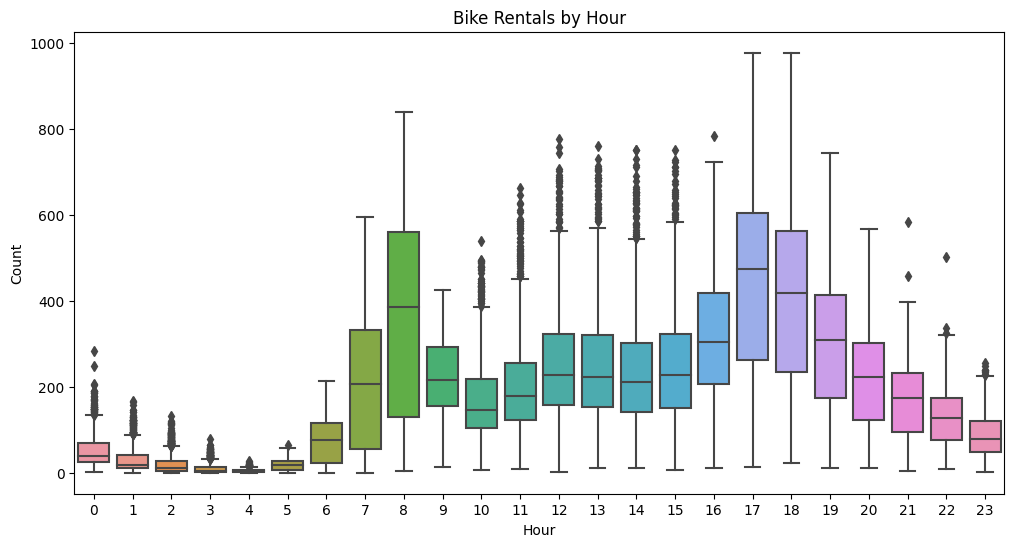

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='hr', y='cnt', data=df)
plt.title('Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

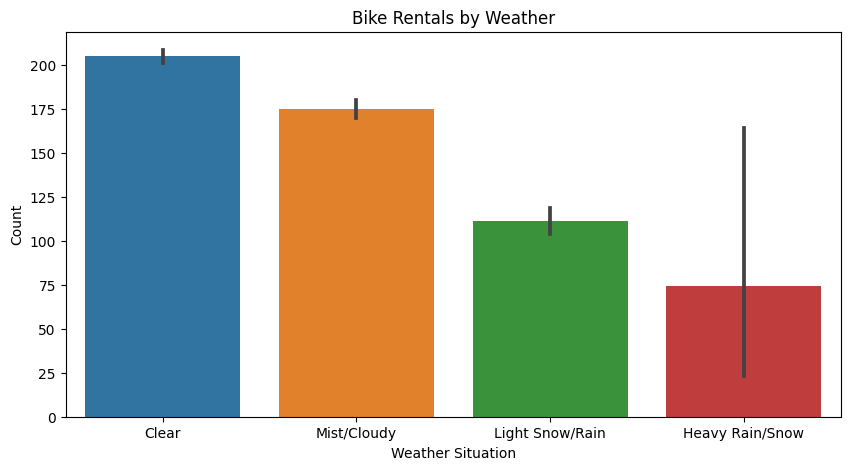

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x='weathersit', y='cnt', data=df)
plt.title('Bike Rentals by Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()   #bike rentals by weather barplot

## 4. Modeling – Predict Hourly Demand
using a simple Linear Regression model to predict hourly rentals

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df_model.drop('cnt', axis=1)
y = df_model['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Evalutaing model

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 10089.31
R² Score: 0.68


## 5. Predicted vs Actual Bike Rentals

visualize how well our model is doing

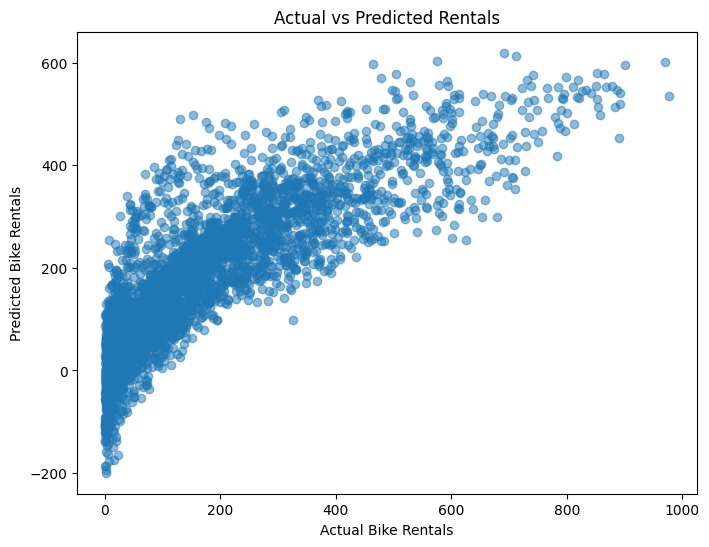

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.title("Actual vs Predicted Rentals")
plt.show()

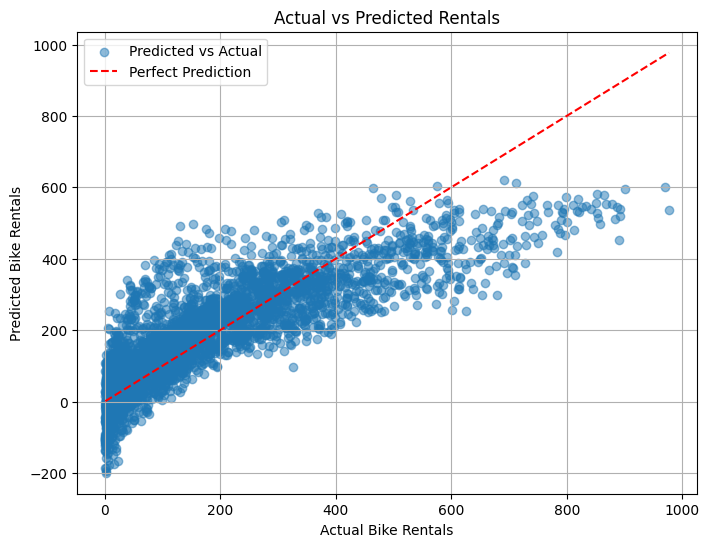

In [18]:
import numpy as np

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')

line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.title("Actual vs Predicted Rentals")
plt.legend()
plt.grid(True)
plt.show()    #checking if my model predicts well or not

## 6. Key Insights & Recommendations

- Rentals spike at **8–9 AM** and **5–6 PM** — peak commuting hours
- Rentals drop significantly on **rainy/snowy days**
- Suggest dynamic bike reallocation based on hourly predictions
- Potential idea: build a dashboard to show **next-hour demand forecast** for managers
